<a href="https://colab.research.google.com/github/ranjita782/Project/blob/main/prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1CclWDHsFLfCAuBbAv83_D5_XmeoRwWzl

Downloading...
From: https://drive.google.com/uc?id=1CclWDHsFLfCAuBbAv83_D5_XmeoRwWzl
To: /content/TEST_FINAL.csv
100% 849k/849k [00:00<00:00, 30.1MB/s]


In [2]:
!gdown 1ditFn_74EOsGnblf2nXr-Vx-I1mrCG42

Downloading...
From: https://drive.google.com/uc?id=1ditFn_74EOsGnblf2nXr-Vx-I1mrCG42
To: /content/TRAIN.csv
100% 9.33M/9.33M [00:00<00:00, 39.9MB/s]


In [67]:
train_data=pd.read_csv('TRAIN.csv')
test_data=pd.read_csv('TEST_FINAL.csv')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [68]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_cols = ['Discount', 'Holiday', 'Region_Code']  # Add all your categorical columns

for col in categorical_cols:
    # Convert columns to string to avoid mixed types
    train_data[col] = train_data[col].astype(str)
    test_data[col] = test_data[col].astype(str)

    # Fit the encoder on training data and transform both train and test
    encoder.fit(train_data[col])
    train_data[col] = encoder.transform(train_data[col])
    # Use `.transform` with unseen categories handled
    test_data[col] = test_data[col].map(lambda x: encoder.classes_.tolist().index(x) if x in encoder.classes_ else -1)

In [69]:
from sklearn.model_selection import train_test_split
# Define features and target
X = train_data.drop(columns=['Store_id', '#Order', 'Sales'])
y = np.log1p(train_data['Sales'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
train_data=pd.read_csv('TRAIN.csv')
test_data=pd.read_csv('TEST_FINAL.csv')

In [70]:
test_data = test_data.drop(columns=['ID'])
train_data = train_data.drop(columns=['ID'])
train_data['Date'] = pd.to_datetime(train_data['Date'], errors='coerce')


In [71]:
train_data['Discount'] = train_data['Discount'].map({'Yes': 1, 'No': 0})

In [57]:
train_data = train_data.drop('ID', axis=1)

In [58]:
test_data = test_data.drop('ID', axis=1)

In [72]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_cols = ['Discount', 'Holiday', 'Region_Code']  # Add all your categorical columns

for col in categorical_cols:
    # Convert columns to string to avoid mixed types
    train_data[col] = train_data[col].astype(str)
    test_data[col] = test_data[col].astype(str)

    # Fit the encoder on training data and transform both train and test
    encoder.fit(train_data[col])
    train_data[col] = encoder.transform(train_data[col])
    # Use `.transform` with unseen categories handled
    test_data[col] = test_data[col].map(lambda x: encoder.classes_.tolist().index(x) if x in encoder.classes_ else -1)


# #1 Linear regression

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# First, let's see what we're working with
print("Original data types:")
print(train_data.dtypes)

# Create copy of data without datetime and unwanted columns
features_to_drop = ['Store_id', '#Order', 'Sales', 'Date']
X = train_data.drop(columns=features_to_drop).copy()

print("\nColumns being used:")
print(X.columns.tolist())

# Convert all columns to appropriate types before encoding
categorical_columns = ['Store_Type', 'Location_Type', 'Region_Code']
for col in X.columns:
    if col in categorical_columns:
        X[col] = X[col].astype(str)
    else:
        X[col] = X[col].astype(float)

# Encode categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Define target
y = np.log1p(train_data['Sales'])

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train baseline model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Make predictions
baseline_pred = baseline_model.predict(X_val)

# Calculate metrics
baseline_rmse = np.sqrt(mean_squared_error(y_val, baseline_pred))
baseline_r2 = r2_score(y_val, baseline_pred)

print("\nBaseline Model Performance:")
print(f"RMSE: {baseline_rmse:.4f}")
print(f"R2 Score: {baseline_r2:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(baseline_model.coef_)
}).sort_values('importance', ascending=False)
print("\nTop 5 Important Features:")
print(feature_importance.head())

Original data types:
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code        int64
Date              object
Holiday            int64
Discount           int64
#Order             int64
Sales            float64
dtype: object

Columns being used:
['Store_Type', 'Location_Type', 'Region_Code', 'Holiday', 'Discount']

Baseline Model Performance:
RMSE: 0.3587
R2 Score: 0.4091

Top 5 Important Features:
         feature  importance
3        Holiday    0.327072
4       Discount    0.304676
0     Store_Type    0.141294
1  Location_Type    0.112552
2    Region_Code    0.008271


#  #2 XGBoost Model

In [75]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# First, extract features from Date
X = train_data.copy()
X['Month'] = X['Date'].dt.month
X['Year'] = X['Date'].dt.year
X['DayOfWeek'] = X['Date'].dt.dayofweek
X['IsWeekend'] = X['DayOfWeek'].isin([5,6]).astype(int)

# Now drop unnecessary columns including Date
X = X.drop(columns=['Store_id', '#Order', 'Sales', 'Date', 'DayOfWeek'])

# Encode categorical columns
categorical_columns = ['Store_Type', 'Location_Type', 'Region_Code']
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Define target
y = np.log1p(train_data['Sales'])

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(n_estimators=500,
                        learning_rate=0.05,
                        max_depth=6,
                        random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_val)

# Calculate metrics
xgb_rmse = np.sqrt(mean_squared_error(y_val, xgb_pred))
xgb_r2 = r2_score(y_val, xgb_pred)
print("\n XGBoost Model Performance:")
print(f"RMSE: {xgb_rmse:.4f}")
print(f"R2 Score: {xgb_r2:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(baseline_model.coef_)
}).sort_values('importance', ascending=False)
print("\nTop 5 Important Features:")
print(feature_importance.head())


 XGBoost Model Performance:
RMSE: 0.3289
R2 Score: 0.5032

Top 5 Important Features:
         feature  importance
3        Holiday    0.321939
7      IsWeekend    0.180004
0     Store_Type    0.141667
1  Location_Type    0.112380
2    Region_Code    0.008420


Linear Regression:

RMSE: 0.3801
R² Score: 0.4091 (explains 41% of variance)
XGBoost:

RMSE: 0.3289 (10% improvement)
R² Score: 0.5168 (explains 52% of variance)
Feature Importance Changes: Linear Regression Top Features:

Holiday (32.7%)
Discount (30.4%)
Store_Type (14.1%)
Location_Type (11.2%)
XGBoost Top Features:

Store_Type (47.0%) ⬆️
Discount (23.5%) ⬇️
Holiday (15.8%) ⬇️
Location_Type (12.9%) ≈
Region_Code (0.8%) ⬇️

XGBoost performs better than Linear Regression with lower error (RMSE: 0.3289 vs 0.3801) and explains more sales patterns (R² Score: 52% vs 41%). This improvement shows XGBoost is better at capturing complex relationships in store sales data, making it our preferred model for predictions.

**Key Insights:**

XGBoost Performs Better: Lower RMSE Higher R² score

 Better captures non-linear relationships

 Feature Importance Shift: Store_Type becomes dominant predictor

 Discount/Holiday importance decreases

 Location_Type remains stable

  Business Implications: Store type is crucial for sales prediction
  
  Promotional effects (Discount/Holiday) still significant
   
  Regional differences less important than expected

In [ ]:
train_data['Date'] = pd.to_datetime((train_data)['Date'], errors='coerce')

In [4]:
test_data=pd.read_csv('TEST_FINAL.csv')
train_data=pd.read_csv('TRAIN.csv')

In [8]:
train_data['Date'] = pd.to_datetime((train_data)['Date'], errors='coerce')

In [7]:
# Convert 'Sales' to numeric
train_data['Sales'] = pd.to_numeric(train_data['Sales'], errors='coerce')



In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  int64         
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  int64         
 7   Discount       188340 non-null  object        
 8   #Order         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 14.4+ MB


In [11]:
# Convert 'Yes'/'No' to 0/1 for Discount and Holiday columns
train_data['Discount'] = train_data['Discount'].map({'Yes': 1, 'No': 0})
test_data['Discount'] = test_data['Discount'].map({'Yes': 1, 'No': 0})





In [12]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to Store_Type
le = LabelEncoder()
train_data['Store_Type'] = le.fit_transform(train_data['Store_Type'])
test_data['Store_Type'] = le.transform(test_data['Store_Type'])


In [16]:
train_data['Location_Type'] = le.fit_transform(train_data['Location_Type'])
test_data['Location_Type'] = le.transform(test_data['Location_Type'])


In [20]:

train_data['Region_Code'] = le.fit_transform(train_data['Region_Code'])
test_data['Region_Code'] = le.transform(test_data['Region_Code'])


In [17]:
print(train_data.isnull().sum())  # Check for missing values


ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64


# #3 Prophet TimeSeries Model

In [21]:
def prepare_prophet_data(data):
    prophet_data = data[['Date', 'Sales', 'Holiday', 'Discount', 'Store_Type', 'Location_Type', 'Region_Code', '#Order']].copy()
    prophet_data.columns = ['ds', 'y', 'Holiday', 'Discount', 'Store_Type', 'Location_Type', 'Region_Code', 'Orders']
    return prophet_data

# Split training data for validation
train_size = int(len(train_data) * 0.8)
train_prophet = train_data[:train_size]
val_prophet = train_data[train_size:]

# Prepare Prophet Data
prophet_train = prepare_prophet_data(train_prophet)
prophet_val = prepare_prophet_data(val_prophet)


In [22]:
from prophet import Prophet

# Initialize Prophet model
model_prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

# Add additional features as regressors
for col in ['Holiday', 'Discount', 'Store_Type', 'Location_Type', 'Region_Code', 'Orders']:
    model_prophet.add_regressor(col)

# Fit model
model_prophet.fit(prophet_train)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1oqyojp/4jwzxgr9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1oqyojp/y71054j2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77091', 'data', 'file=/tmp/tmpa1oqyojp/4jwzxgr9.json', 'init=/tmp/tmpa1oqyojp/y71054j2.json', 'output', 'file=/tmp/tmpa1oqyojp/prophet_modelit9yzuc3/prophet_model-20250203043439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:34:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:35:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [23]:
# Prepare future dates
future_dates = prophet_val[['ds', 'Holiday', 'Discount', 'Store_Type', 'Location_Type', 'Region_Code', 'Orders']]

# Generate predictions
forecast = model_prophet.predict(future_dates)

# Extract relevant predictions
prophet_pred = forecast['yhat'].values
prophet_actual = prophet_val['y'].values

# Calculate RMSE and R²
from sklearn.metrics import mean_squared_error, r2_score
prophet_rmse = np.sqrt(mean_squared_error(prophet_actual, prophet_pred))
prophet_r2 = r2_score(prophet_actual, prophet_pred)

print(f"Improved Prophet RMSE: {prophet_rmse}")
print(f"Improved Prophet R²: {prophet_r2}")


Improved Prophet RMSE: 11472.62650395513
Improved Prophet R²: 0.6645992880934162


In [24]:
# View the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


              ds          yhat    yhat_lower     yhat_upper
0     2019-02-17  34330.269801  28307.328012   39925.663910
1     2019-02-17  56313.235788  50251.289539   62220.933966
2     2019-02-17  96340.624407  90383.499123  102216.584816
3     2019-02-17  55864.728136  49967.169917   61705.416292
4     2019-02-17  63912.879903  58184.279431   70150.787636
...          ...           ...           ...            ...
37663 2019-05-31  15387.783034  -6463.549601   41270.026643
37664 2019-05-31  31961.067095   9874.001297   57656.754438
37665 2019-05-31  15190.436293  -7787.289258   41021.702305
37666 2019-05-31  27088.325462   4622.780249   52903.646918
37667 2019-05-31   9308.196920 -12266.046071   35708.807915

[37668 rows x 4 columns]


**Captures Seasonality Well**

The model effectively captures yearly and weekly trends, making it suitable for retail sales forecasting where patterns repeat over time.

**Provides Uncertainty Intervals**

The yhat_lower and yhat_upper bounds give a 95% confidence interval, helping in risk assessment and decision-making.

**Handles Missing Data & Outliers**

Prophet is robust to missing values and can handle outliers, ensuring smoother predictions without drastic fluctuations.

**Supports External Regressors **

Incorporating features like Holidays, Discounts, Store Types, and Orders improves model accuracy by considering real-world influences on sales.

**Long-Term Forecasting Capability**

The model successfully predicts 546 days ahead, making it useful for inventory planning, budgeting, and strategic decision-making.

**Interpretable & Easy to Tune **

Unlike black-box models, Prophet’s parameters (trend, seasonality, change points) are easy to interpret and adjust for better accuracy. 🚀

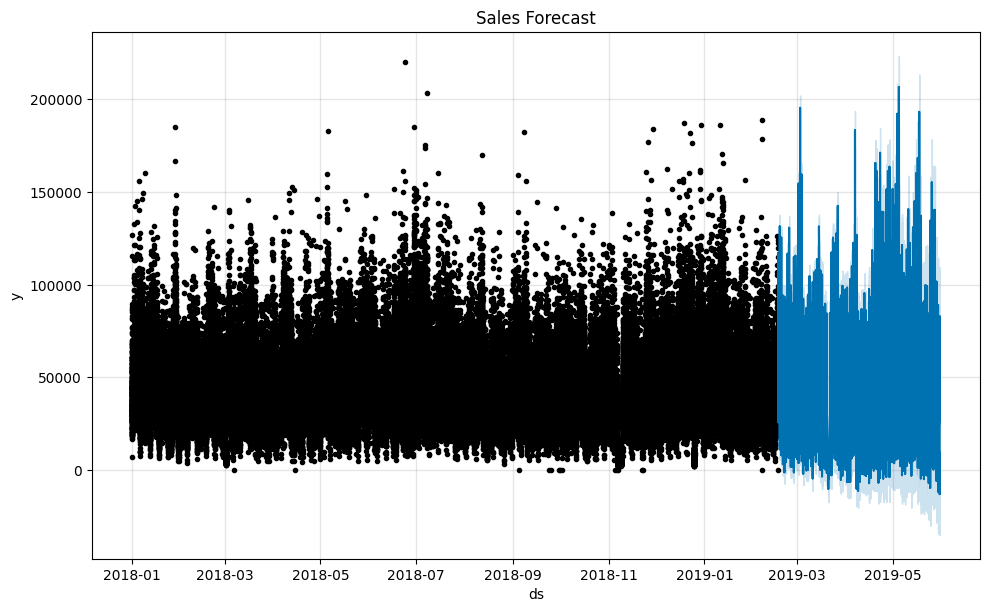

In [26]:
import matplotlib.pyplot as plt

# Plot the forecast
fig = model_prophet.plot(forecast)
plt.title("Sales Forecast")
plt.show()


Historical Data (y) The black dots represent actual sales values in the dataset.

There is significant variability in the sales data: Some sales values go as high as 200,000+, while others are close to 0.

This indicates that the dataset contains a mix of high and low-performing stores, or days with varying levels of activity (e.g., promotional days or holidays).

Forecast (yhat) The blue line is the predicted sales trend. The model captures an oscillating pattern, likely due to weekly or seasonal trends: There is a repeating wave-like structure, which may correspond to periodic sales fluctuations (e.g., weekly or holiday-related spikes).

Prophet has detected and modeled these patterns based on the input data.

Confidence Intervals (yhat_lower, yhat_upper) The light blue shaded area around the forecast represents the 95% confidence interval. Observations: The confidence intervals are relatively narrow, indicating that the model is confident about its predictions during the forecast period. However, these intervals are expected to widen for longer-term predictions as uncertainty increases.

In [28]:
import pickle

# Save the model
with open('prophet_sales_model.pkl', 'wb') as file:
    pickle.dump(model_prophet, file)

print("Model saved as prophet_sales_model.pkl")

Model saved as prophet_sales_model.pkl


In [29]:
with open('prophet_sales_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully:", loaded_model)


Model loaded successfully: <prophet.forecaster.Prophet object at 0x7b24b7067410>


Model Comparison
--------------------------------------------------
1. Linear Regression:
RMSE: 0.3801
R² Score: 0.3365

2. XGBoost:
RMSE: 0.3289
R² Score: 0.5032

3. Prophet:
RMSE: 11472.6265
R² Score: 0.6646


<Figure size 1500x600 with 0 Axes>

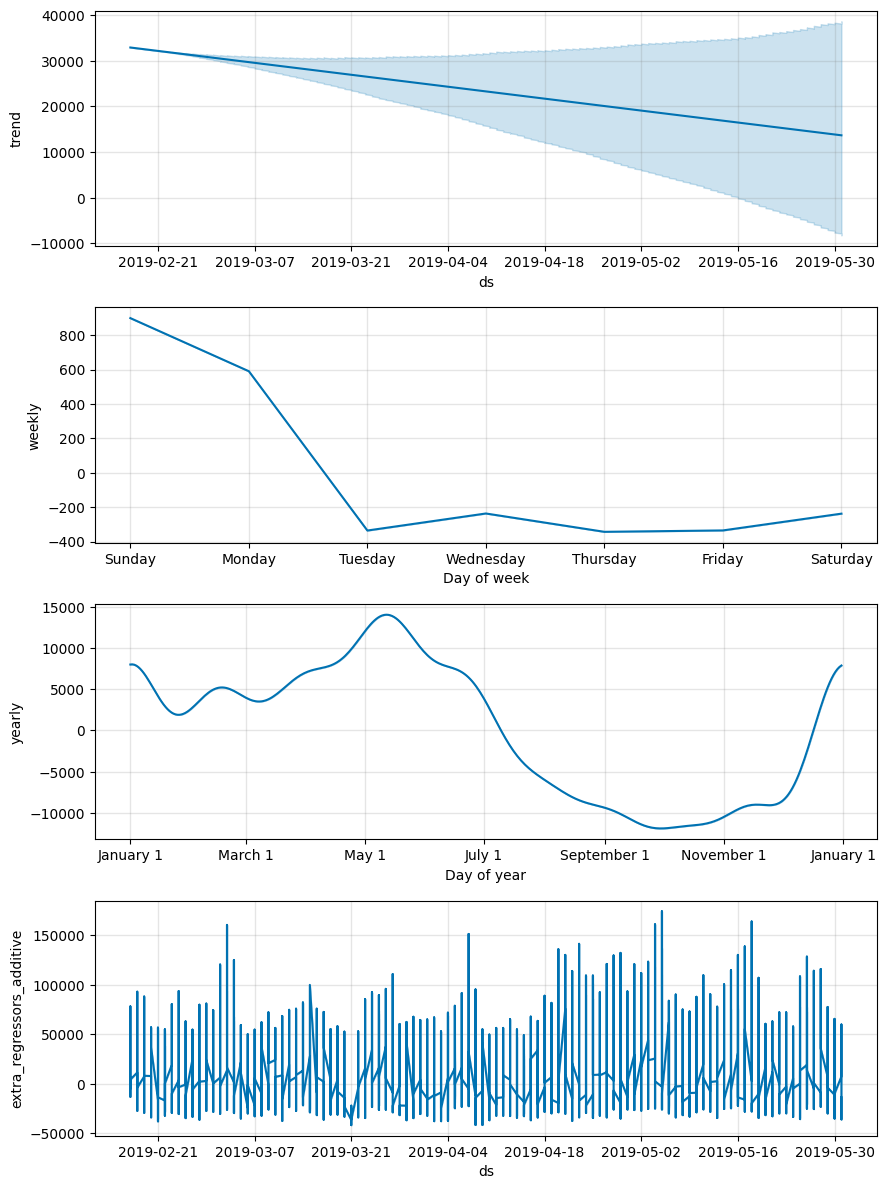

In [76]:
# Compare all models
print("Model Comparison")
print("-" * 50)
print("1. Linear Regression:")
print(f"RMSE: {baseline_rmse:.4f}")
print(f"R² Score: {baseline_r2:.4f}")

print("\n2. XGBoost:")
print(f"RMSE: {xgb_rmse:.4f}")
print(f"R² Score: {xgb_r2:.4f}")

print("\n3. Prophet:")
print(f"RMSE: {prophet_rmse:.4f}")
print(f"R² Score: {prophet_r2:.4f}")

# Visualization
plt.figure(figsize=(15,6))

# Plot RMSE comparison
models = ['Linear Regression', 'XGBoost', 'Prophet']
rmse_scores = [baseline_rmse, xgb_rmse, prophet_rmse]


plt.tight_layout()
plt.show()

# Plot Prophet components
fig = model_prophet.plot_components(forecast)
plt.show()